#### Case of Busisness Sales Transaction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Business Sales Transaction.csv')

C:\Users\DELL\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,536365,2018-12-01,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850.0,United Kingdom
1,536365,2018-12-01,71053,White Moroccan Metal Lantern,2.01,6,17850.0,United Kingdom
2,536365,2018-12-01,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850.0,United Kingdom
3,536365,2018-12-01,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850.0,United Kingdom
4,536365,2018-12-01,84029E,Red Woolly Hottie White Heart,2.01,6,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


In [5]:
df.describe()

,Price,Quantity,CustomerNo
count,536350.000000,536350.000000,536295.000000
mean,1.990811,9.919347,15227.893178
std,0.673649,216.662300,1716.582932
min,1.500000,-80995.000000,12004.000000
25%,1.690000,1.000000,13807.000000
50%,1.810000,3.000000,15152.000000
75%,2.120000,10.000000,16729.000000
max,98.920000,80995.000000,18287.000000


### In Data Analysis What All Things We Do
#### 1.Missing Values
#### 2.Explore About the Numerical Variables
#### 3.Explore About categorical Variables
#### 4.Finding Relationship between features

In [6]:
df.shape

(536350, 8)

In [7]:
df.isnull().sum()

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
dtype: int64

In [8]:
## Let find out the columns where there is missing value

[features for features in df.columns if df[features].isnull().sum()>0]

['CustomerNo']

In [9]:
df['CustomerNo'].mode()[0]

17841.0

In [10]:
## Replace the missing values with mode
df['CustomerNo']=df['CustomerNo'].fillna(df['CustomerNo'].mode()[0])

In [11]:
df['CustomerNo'].isnull().sum()

0

In [12]:
df.isnull().sum()

TransactionNo    0
Date             0
ProductNo        0
ProductName      0
Price            0
Quantity         0
CustomerNo       0
Country          0
dtype: int64

<AxesSubplot:>

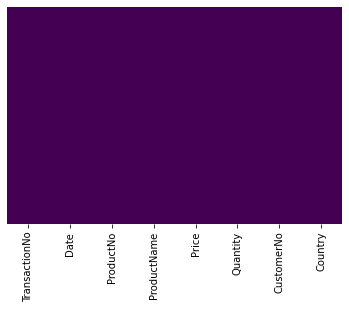

In [13]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [14]:
df.shape

(536350, 8)

In [15]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [16]:
## Create a pie chart for top 5 Country distribution
df.Country.value_counts().index

Index(['United Kingdom', 'Germany', 'France', 'EIRE', 'Belgium', 'Spain',
       'Switzerland', 'Netherlands', 'Portugal', 'Australia', 'Norway',
       'Austria', 'Iceland', 'Finland', 'Italy', 'Channel Islands', 'Cyprus',
       'Unspecified', 'Sweden', 'Denmark', 'USA', 'Japan', 'Israel',
       'Singapore', 'Poland', 'Hong Kong', 'Canada', 'Malta',
       'United Arab Emirates', 'Greece', 'European Community', 'RSA',
       'Lebanon', 'Lithuania', 'Brazil', 'Czech Republic', 'Bahrain',
       'Saudi Arabia'],
      dtype='object')

In [17]:
country_val=df.Country.value_counts().values

Observation:We notice that  maximum  records or sale transaction are from United Kingdom then follow by Germany and France .

In [18]:
ratings=df.groupby(['ProductName', 'Price','Quantity',]).size().reset_index().rename(columns={0:'Rating Count'})

In [19]:
ratings.head()

,ProductName,Price,Quantity,Rating Count
0,10 Colour Spaceboy Pen,1.61,144,5
1,10 Colour Spaceboy Pen,1.61,288,1
2,10 Colour Spaceboy Pen,1.63,-48,1
3,10 Colour Spaceboy Pen,1.63,-24,4
4,10 Colour Spaceboy Pen,1.63,-11,1


In [20]:
df['ProductName'].unique()

array(['Cream Hanging Heart T-Light Holder',
       'White Moroccan Metal Lantern', 'Cream Cupid Hearts Coat Hanger',
       ..., 'Blue Flying Singing Canary', 'Sweetheart Key Cabinet',
       'Travel Card Wallet Dotcomgiftshop'], dtype=object)

Observation: We notice that the product name: Colour Spaceboy Pen with price of 1.61 unity is the most sold.

In [21]:
### Find the countries name that has given 0 rating 
df[df['ProductName']=='10 Colour Spaceboy Pen'].groupby('Country').size().reset_index()

,Country,0
0,Australia,1
1,Austria,1
2,Belgium,1
3,Canada,1
4,Channel Islands,1
5,EIRE,4
6,France,15
7,Germany,12
8,Hong Kong,1
9,Iceland,1


Observations: Maximum number of 0 ratings are from United Kingdom customers

In [22]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [23]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,536365,2018-12-01,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850.0,United Kingdom
1,536365,2018-12-01,71053,White Moroccan Metal Lantern,2.01,6,17850.0,United Kingdom
2,536365,2018-12-01,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850.0,United Kingdom
3,536365,2018-12-01,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850.0,United Kingdom
4,536365,2018-12-01,84029E,Red Woolly Hottie White Heart,2.01,6,17850.0,United Kingdom


####  Feature Engineering

In [24]:
df.dtypes

TransactionNo     object
Date              object
ProductNo         object
ProductName       object
Price            float64
Quantity           int64
CustomerNo       float64
Country           object
dtype: object

In [25]:
# Drop the date coulmn
df=df.drop('Date',axis=1)

In [26]:
df.head()

,TransactionNo,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,536365,85123A,Cream Hanging Heart T-Light Holder,1.88,6,17850.0,United Kingdom
1,536365,71053,White Moroccan Metal Lantern,2.01,6,17850.0,United Kingdom
2,536365,84406B,Cream Cupid Hearts Coat Hanger,1.91,8,17850.0,United Kingdom
3,536365,84029G,Knitted Union Flag Hot Water Bottle,2.01,6,17850.0,United Kingdom
4,536365,84029E,Red Woolly Hottie White Heart,2.01,6,17850.0,United Kingdom


In [27]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["ProductNo"]=encoder.fit_transform(df['ProductNo'])
df["ProductName"]=encoder.fit_transform(df['ProductName'])
df["Country"]=encoder.fit_transform(df['Country'])



In [28]:
df.head()

,TransactionNo,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,536365,3286,828,1.88,6,17850.0,36
1,536365,2698,3605,2.01,6,17850.0,36
2,536365,2891,825,1.91,8,17850.0,36
3,536365,2839,1714,2.01,6,17850.0,36
4,536365,2838,2657,2.01,6,17850.0,36


In [29]:
# check the coorelation among independent feature and dependent feature
df.corr()

,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
ProductNo,1.000000,-0.040728,0.041278,-0.000739,0.010787,0.018678
ProductName,-0.040728,1.000000,0.000537,-0.000024,-0.004781,-0.011663
Price,0.041278,0.000537,1.000000,-0.014626,-0.018255,0.004763
Quantity,-0.000739,-0.000024,-0.014626,1.000000,-0.002263,-0.009654
CustomerNo,0.010787,-0.004781,-0.018255,-0.002263,1.000000,0.354095
Country,0.018678,-0.011663,0.004763,-0.009654,0.354095,1.000000


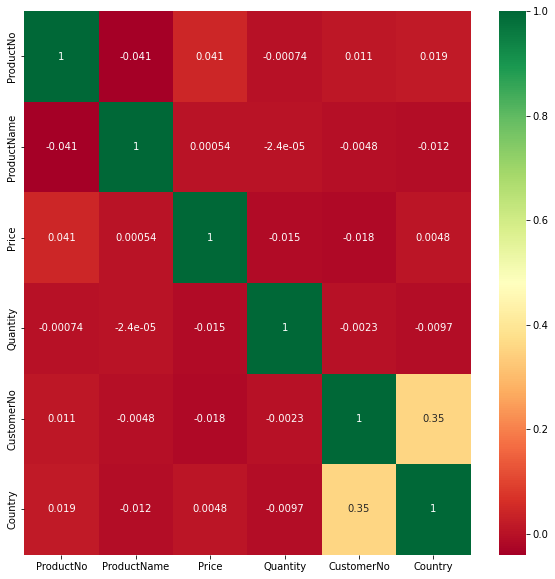

In [30]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

#### After transforming the data we can proced to the feature selection. 

### Feature Selection

In [31]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [32]:
df_train=df[0:10683]
df_test=df[10683:]

In [33]:
X=df_train.drop(['Price'],axis=1)
y=df_train.Price

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [35]:
model=SelectFromModel(Lasso(alpha=0.005,random_state=0))

In [36]:
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [37]:
model.get_support()

array([ True,  True,  True,  True, False,  True])

In [38]:
selected_features=X_train.columns[(model.get_support())]

In [39]:
selected_features

Index(['TransactionNo', 'ProductNo', 'ProductName', 'Quantity', 'Country'], dtype='object')

### Random Forest Regressor


In [40]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [41]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [42]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [43]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [44]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=100, n_estimators=400; total time=   1.6s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   4.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=50, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [45]:
y_pred=rf_random.predict(X_test)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

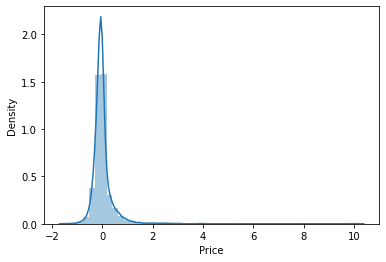

In [46]:
import seaborn as sns

sns.distplot(y_test-y_pred)

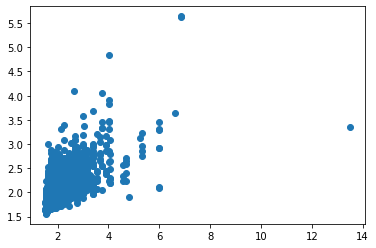

In [47]:
plt.scatter(y_test,y_pred)

#### Observation: We can observe that the price prediction won't be beyong 2.

